In [ ]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt
import seaborn as sns

#We're using read_csv to read csv files and retrive data from Groceries
#df.head() is used give top 5 data of the dataset its gives default 5 data.
#A DataFrame is the core structure for analyzing and working with data in Python using Pandas. It’s simple, flexible, and powerful.

df = pd.read_csv("/Groceries_dataset (1).csv")
df.head()


,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


In [ ]:
#Preprocessing of data
# Creates a unique transaction ID by combining customer number and date.
# This helps group all items bought together in one shopping trip.
# Groups the data by each transaction and collects the items bought into a list.
# Result: A list of shopping carts (each cart = list of items).

df['Transaction'] = df['Member_number'].astype(str) + '_' + df['Date']
transactions = df.groupby('Transaction')['itemDescription'].apply(list).tolist()
df.head()

,Member_number,Date,itemDescription,Transaction
0,1808,21-07-2015,tropical fruit,1808_21-07-2015
1,2552,05-01-2015,whole milk,2552_05-01-2015
2,2300,19-09-2015,pip fruit,2300_19-09-2015
3,1187,12-12-2015,other vegetables,1187_12-12-2015
4,3037,01-02-2015,whole milk,3037_01-02-2015


In [ ]:
#One-hot Encoding (Transaction Format to 0/1 Matrix)
#This code transforms transactions into a table where each row shows which items were bought.
#It’s used to prepare data for the Apriori algorithm to find frequent item combinations.

te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)
print(df_encoded[['whole milk', 'yogurt']].head())

   whole milk  yogurt
0        True    True
1        True   False
2       False   False
3       False   False
4       False   False


In [ ]:
frequent_itemsets = apriori(df_encoded, min_support=0.01, use_colnames=True)
frequent_itemsets.head()


,support,itemsets
0,0.021386,(UHT-milk)
1,0.033950,(beef)
2,0.021787,(berries)
3,0.016574,(beverages)
4,0.045312,(bottled beer)


This line finds item combinations (frequent itemsets) that appear in at least 10% of all transactions. Displaying it shows which products are most commonly bought together. These frequent itemsets help identify customer buying patterns for better product bundling, inventory planning, and targeted promotions.

In [ ]:
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.1)

This line generates association rules from the frequent itemsets with a minimum confidence of 50%, meaning it finds strong "if-then" patterns in the data. For example, if customers buy item A, they are at least 50% likely to buy item B. These rules help identify product relationships, useful for recommendations, cross-selling, and inventory decisions.

In [ ]:
rules = rules.sort_values(by='lift', ascending=False)
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head(10))

          antecedents   consequents   support  confidence      lift
3            (yogurt)  (whole milk)  0.011161    0.129961  0.822940
1        (rolls/buns)  (whole milk)  0.013968    0.126974  0.804028
0  (other vegetables)  (whole milk)  0.014837    0.121511  0.769430
2              (soda)  (whole milk)  0.011629    0.119752  0.758296


This output shows the strongest item relationships in the dataset. A high lift (>1) means the items are bought together more often than expected by chance. These rules are the most valuable for:

Creating product bundles
Making recommendation systems
Improving store layout and inventory decisions

/tmp/ipython-input-31-2749506617.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='lift', y=rules['antecedents'].astype(str) + " → " + rules['consequents'].astype(str), data=rules.head(10), palette="viridis")


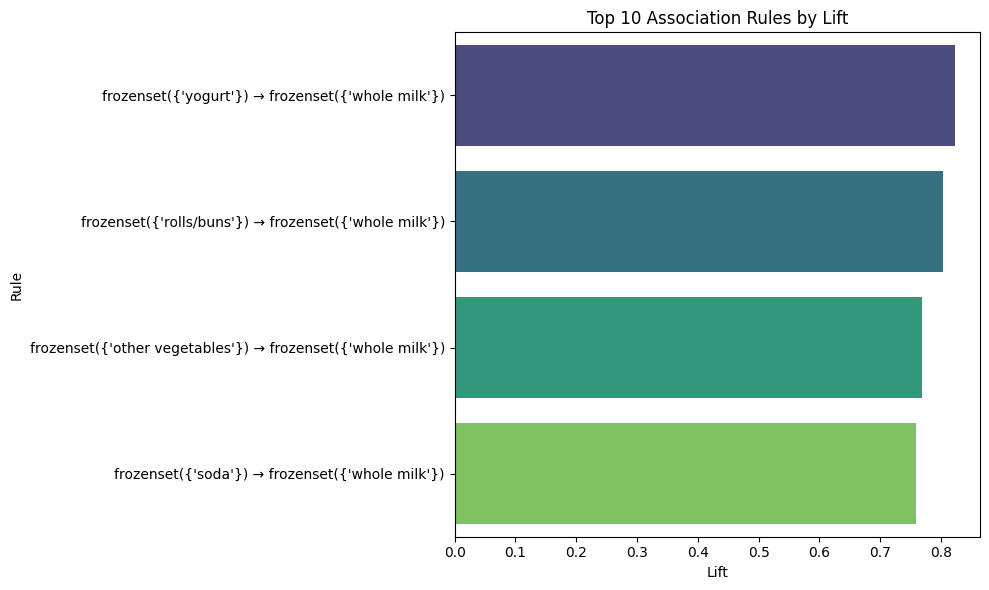

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x='lift', y=rules['antecedents'].astype(str) + " → " + rules['consequents'].astype(str), data=rules.head(10), palette="viridis")
plt.title('Top 10 Association Rules by Lift')
plt.xlabel('Lift')
plt.ylabel('Rule')
plt.tight_layout()
plt.show()

This plot visually highlights the strongest product relationships. Rules with higher lift values indicate strong and useful associations for decision-making like placing items together, bundling offers, or making smart inventory and marketing moves.